### Import libraries

In [38]:
import sys
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns

### Check Libraries versions 

In [39]:
print(f" Python: {sys.version}")
print(f" Pandas: {pd.__version__}")
print(f" scipy: {scipy.__version__}")
print(f" matplotlib: {matplotlib.__version__}")
print(f" sklearn: {sklearn.__version__}")

 Python: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
 Pandas: 2.3.3
 scipy: 1.15.3
 matplotlib: 3.10.8
 sklearn: 1.7.2


In [40]:
url= "https://archive.ics.uci.edu/static/public/53/iris.zip"

### LOAD DATASET

In [41]:
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

dataset = pd.read_csv("iris.data", names=names)

In [42]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
dataset.shape

(150, 5)

In [44]:
dataset.head(30)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [45]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### VISUALIZE DATASET

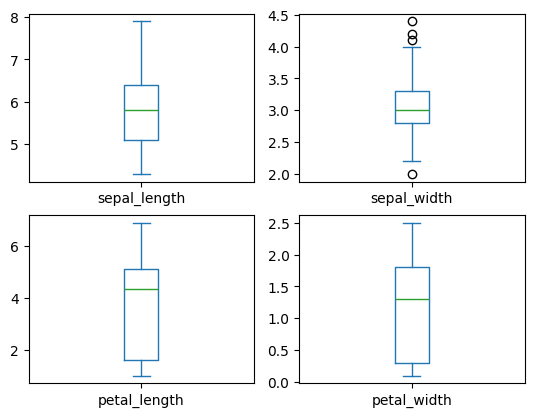

In [47]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

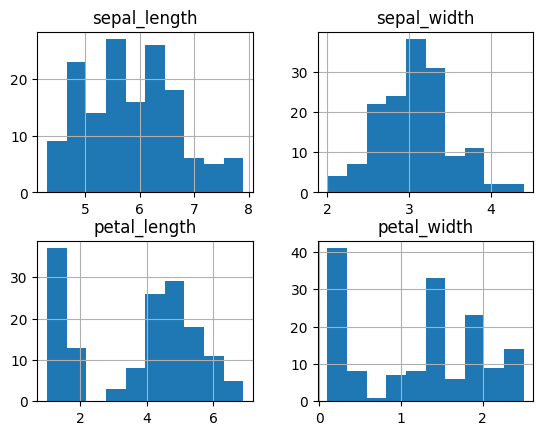

In [48]:
dataset.hist()
plt.show()

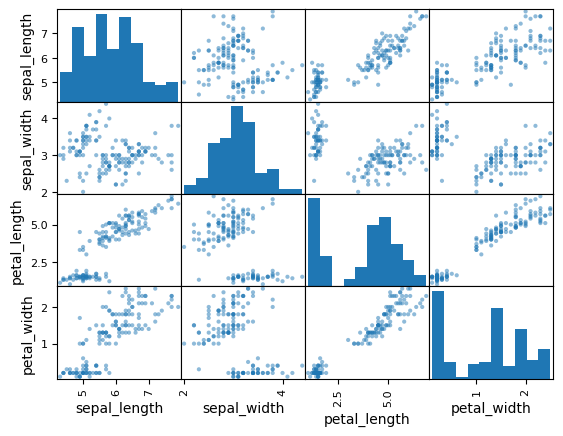

In [49]:
pd.plotting.scatter_matrix(dataset)
plt.show()

<Axes: xlabel='petal_length', ylabel='Count'>

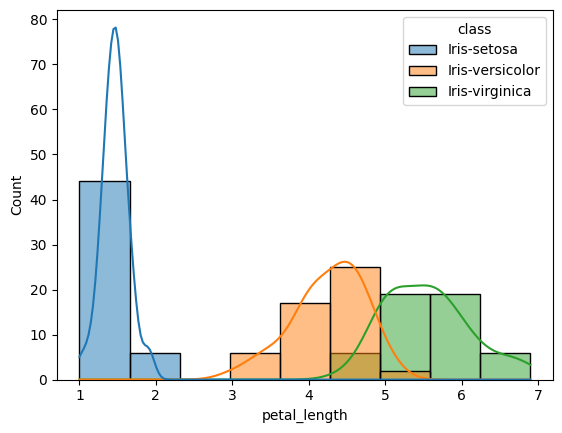

In [50]:
sns.histplot(data=dataset,
             x="petal_length",
             hue="class",
             kde=True)

### Split Dataset Into Train and Test

In [51]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4] 
validation_size = 0.20
seed = 6

# X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_, Y, test_size=validation_size, random_state=seed)

In [52]:
X_ = dataset.drop('class', axis=1).values
Y_ = dataset['class'].values
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_, Y_, test_size=validation_size, random_state=seed)

In [53]:
seed = 6
scoring = 'accuracy'

### Model Comparison

In [54]:
model =[]

model.append(('LR', sklearn.linear_model.LogisticRegression()))
model.append(('LDA', sklearn.discriminant_analysis.LinearDiscriminantAnalysis()))
model.append(('KNN', sklearn.neighbors.KNeighborsClassifier())) 
model.append(('CART', sklearn.tree.DecisionTreeClassifier()))
model.append(('NB', sklearn.naive_bayes.GaussianNB()))
model.append(('SVM', sklearn.svm.SVC()))
model.append(('RF', sklearn.ensemble.RandomForestClassifier()))
results = []
names = []

for name, model in model:
    kfold = sklearn.model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = sklearn.model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")

c:\Users\USER\Documents\machine_learning_paid_course\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\Documents\machine_learning_paid_course\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https

LR: 0.9666666666666668 (0.04472135954999579)
LDA: 0.9800000000000001 (0.030550504633038926)
KNN: 0.9733333333333334 (0.03265986323710903)
CART: 0.9466666666666667 (0.05811865258054231)
NB: 0.9533333333333335 (0.04268749491621898)
SVM: 0.9600000000000002 (0.06110100926607785)
RF: 0.9600000000000002 (0.044221663871405324)


### Train Best Model on Training Data

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

final_model = LinearDiscriminantAnalysis()
final_model.fit(X_train, Y_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


### Predict on Test Set

In [56]:
predictions = final_model.predict(X_test)

### Evaluate Performance

In [57]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, predictions))

1.0


In [58]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, predictions))

[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]]


In [59]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### ML Pipeline

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', sklearn.discriminant_analysis.LinearDiscriminantAnalysis())
    # ('lr', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, Y_train)

,steps,"[('scaler', ...), ('lda', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None


In [70]:
y_pred = pipeline.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 1.0


In [72]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [73]:
import joblib

joblib.dump(pipeline, "iris_classifier.pkl")

['iris_classifier.pkl']

In [74]:
model = joblib.load("iris_classifier.pkl")
# prediction = model.predict(new_data)

In [75]:
import numpy as np

new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])

prediction = model.predict(new_flower)

print("Predicted class:", prediction)

Predicted class: ['Iris-setosa']


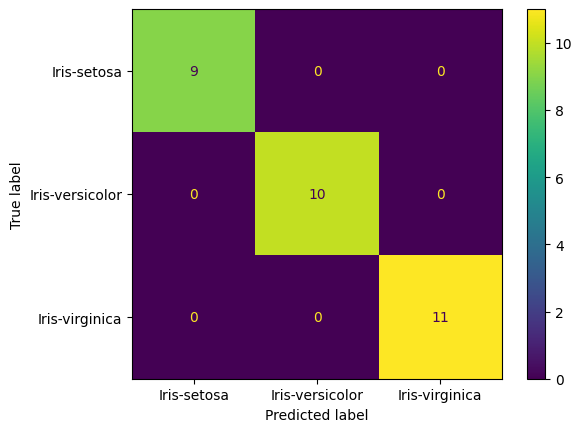

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    pipeline,
    X_test,
    Y_test
)

plt.show()

In [77]:
import joblib
import numpy as np

model = joblib.load("iris_classifier.pkl")

sample = np.array([[6.0, 3.0, 4.8, 1.8]])

prediction = model.predict(sample)

print(prediction)

['Iris-virginica']
